# **TikTok Machine Learning Project**
*Adapted From the Google Nuts and Bolts of Machine Learning Course*

**The Scenerio:** Your supervisor requested that you build a machine learning model that can be used to determine whether a TikTok video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This project has four parts:*

**Part 1: Ethical considerations**
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2: Data Exploration**
* Explore the data and build some basic visualizations

**Part 3: Feature engineering**

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 4: Modeling**

* Build the machine learning models, evaluate them, and pick the final model



# **Part 1: Ethical Considerations**

*The questions below were provided by the Coursera course The Nuts and Bolts of Machine Learning.*


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

I am being asked to classify videos into claims or opinions. Some claims might be potentially dangerous for users so having a machine learning algorithms that is able to detect a claim could be useful for a company like TikTok. To evaluate the sucess of the model common classification metrics like the f1 score, precision, recall, and accuracy should be used. "Claim" should be the positive case and "Opinion" should be the negative.

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**

It is important that this model is able to correctly detect claims because claims present more potential danger to users than an opinion (for instance false healthcare information is likely more dangerous than someone's opinion on the best cars of 2024). This model alone will likely not prove too helpful, but this claim detector combined with a model evaluating the danger of a claim could catch dangerous content. This is important work for a social media company like TikTok.

3.   **How would you proceed?**

I will use NLP techniques along with common machine learning algorithms to see if I can correctly detect the videos with claims in them. We will know how well the model performs by splitting the data and then testing it using the common metrics I suggested above.

### **Imports and data loading**

All data for this project was provided in the course *The Nuts and Bolts of Machine Learning* which is the sixth course in the Google Advanced Analytics Professional Certificate on Coursera. 

In [1]:
# Standard Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset into dataframe
df= pd.read_csv("tiktok_dataset.csv")

### **Examine data, summary info, and descriptive stats**

In [3]:
# Display first ten rows
pd.options.display.float_format = '{:.2f}'.format

df.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.00,19425.00,241.00,1.00,0.00
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.00,77355.00,19034.00,1161.00,684.00
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.00,97690.00,2858.00,833.00,329.00
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.00,239954.00,34812.00,1234.00,584.00
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.00,34987.00,4110.00,547.00,152.00
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.00,175546.00,62303.00,4293.00,1857.00
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.00,486192.00,193911.00,8616.00,5446.00
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.00,1072.00,50.00,22.00,11.00
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.00,10160.00,1050.00,53.00,27.00
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.00,171051.00,67739.00,4104.00,2540.00


In [4]:
# Get number of rows and columns
df.shape

(19382, 12)

In [5]:
# Get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
# Generate basic descriptive stats
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.00,19382.00,19382.00,19084.00,19084.00,19084.00,19084.00,19084.00
mean,9691.50,5627454067.34,32.42,254708.56,84304.64,16735.25,1049.43,349.31
std,5595.25,2536440464.17,16.23,322893.28,133420.55,32036.17,2004.30,799.64
min,1.00,1234959018.00,5.00,20.00,0.00,0.00,0.00,0.00
25%,4846.25,3430416807.25,18.00,4942.50,810.75,115.00,7.00,1.00
50%,9691.50,5618663579.00,32.00,9954.50,3403.50,717.00,46.00,9.00
75%,14536.75,7843960211.25,47.00,504327.00,125020.00,18222.00,1156.25,292.00
max,19382.00,9999873075.00,60.00,999817.00,657830.00,256130.00,14994.00,9599.00


In [7]:
# Statistics for "Claim" videos
df[df['claim_status']=='claim'].describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,9608.00,9608.00,9608.00,9608.00,9608.00,9608.00,9608.00,9608.00
mean,4804.50,5627264339.77,32.49,501029.45,166373.33,33026.42,2070.95,691.16
std,2773.74,2543868998.87,16.17,291349.24,147623.37,38781.68,2424.38,1017.22
min,1.00,1236284548.00,5.00,1049.00,0.00,0.00,0.00,0.00
25%,2402.75,3400723182.75,18.00,247003.75,43436.75,5062.25,324.75,68.00
50%,4804.50,5607671514.00,32.00,501555.00,123649.00,17997.50,1139.50,286.00
75%,7206.25,7834910443.75,47.00,753088.00,255715.25,47256.00,2935.50,886.00
max,9608.00,9999873075.00,60.00,999817.00,657830.00,256130.00,14994.00,9599.00


In [8]:
# Statistics for "Opinion" videos
df[df['claim_status']=='opinion'].describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,9476.00,9476.00,9476.00,9476.00,9476.00,9476.00,9476.00,9476.00
mean,14346.50,5622381723.96,32.36,4956.43,1092.73,217.15,13.68,2.70
std,2735.63,2530209086.45,16.28,2885.91,964.10,252.27,16.20,4.09
min,9609.00,1234959018.00,5.00,20.00,0.00,0.00,0.00,0.00
25%,11977.75,3448802395.50,18.00,2467.00,289.00,34.00,2.00,0.00
50%,14346.50,5611857036.00,32.00,4953.00,823.00,121.00,7.00,1.00
75%,16715.25,7853242704.50,47.00,7447.25,1664.00,314.00,19.00,3.00
max,19084.00,9999834973.00,60.00,9998.00,4375.00,1674.00,101.00,32.00


#### Some thoughts on the above statistics

From the above statistics, we are seeing some pretty dramatic differences in the popularity of claim videos vs opinion videos. Claim videos seem much more popular when measured the things like view count, share count, like count, etc.

In [9]:
# Check for missing values
df.isnull().any()

#                           False
claim_status                 True
video_id                    False
video_duration_sec          False
video_transcription_text     True
verified_status             False
author_ban_status           False
video_view_count             True
video_like_count             True
video_share_count            True
video_download_count         True
video_comment_count          True
dtype: bool

In [10]:
# Drop rows with missing values
df = df.dropna()

In [11]:
# Display first ten rows after handling missing values
df.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.00,19425.00,241.00,1.00,0.00
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.00,77355.00,19034.00,1161.00,684.00
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.00,97690.00,2858.00,833.00,329.00
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.00,239954.00,34812.00,1234.00,584.00
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.00,34987.00,4110.00,547.00,152.00
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.00,175546.00,62303.00,4293.00,1857.00
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.00,486192.00,193911.00,8616.00,5446.00
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.00,1072.00,50.00,22.00,11.00
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.00,10160.00,1050.00,53.00,27.00
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.00,171051.00,67739.00,4104.00,2540.00


In [12]:
# Check for duplicates
df[df.duplicated()]


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count


In [13]:
# Check class balance
df.groupby("claim_status").count()

,#,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
claim_status,,,,,,,,,,,
claim,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608
opinion,9476,9476,9476,9476,9476,9476,9476,9476,9476,9476,9476


### Graphing and checking for outliers

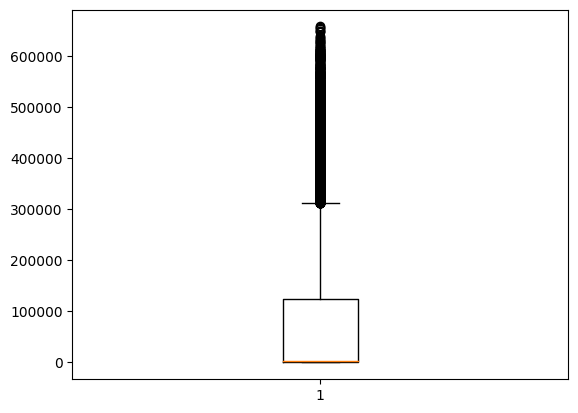

In [14]:
#Boxplot of video like count
plt.boxplot(df["video_like_count"])
plt.show()

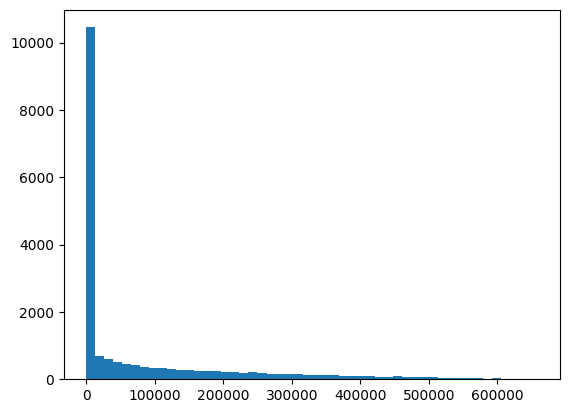

In [15]:
#Histogram of video like count
plt.hist(df["video_like_count"], bins=50)
plt.show()

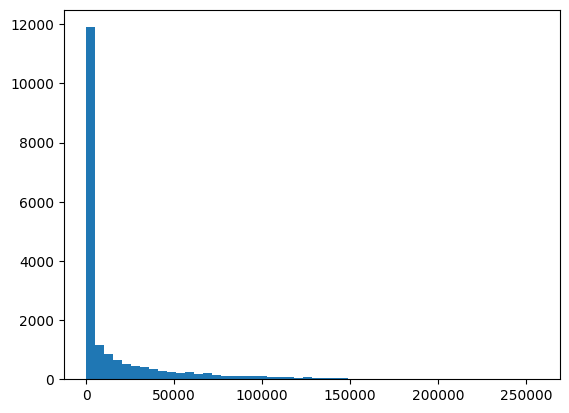

In [16]:
# Histogram of video share count
plt.hist(df["video_share_count"], bins=50)
plt.show()

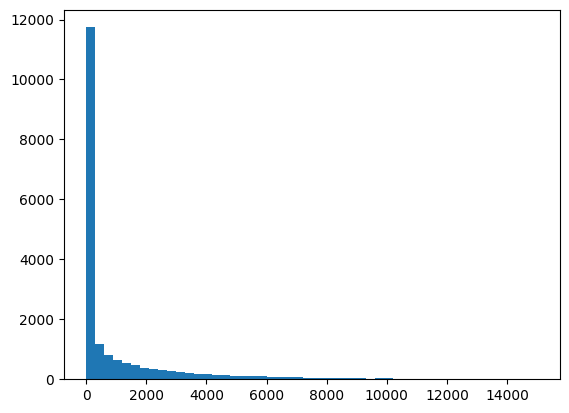

In [17]:
plt.hist(df["video_download_count"], bins=50)
plt.show()

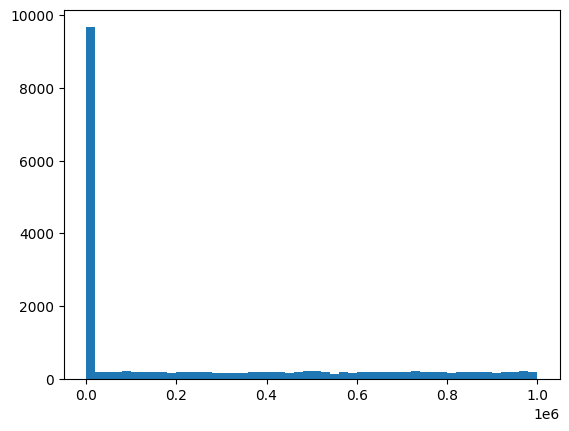

In [18]:
#Histogram of video view count
plt.hist(df["video_view_count"], bins=50)
plt.show()

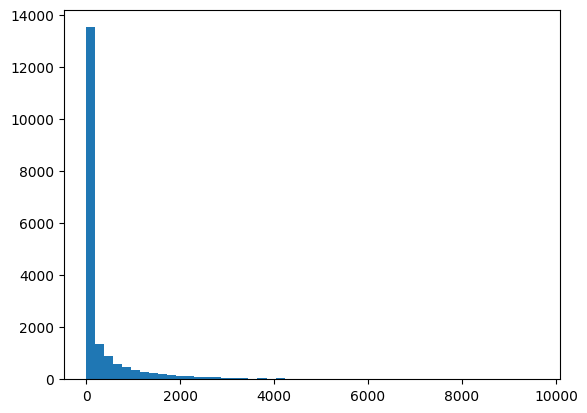

In [19]:
# Histogram of video comment count
plt.hist(df["video_comment_count"], bins=50)
plt.show()

#### Some Thoughts on the Skewness of the Data

All of the 'count' columns of the data set are highly right skewed. Under some circumstances, you could take out the outliers, but given the shape the the skew, I think a logarithmic transformation would make the columns usable without removing any "outliers".

# **Part 3: Feature engineering**

We want to transform the columns of data to make them more usable for machine learning purposes. We will perform logarithic transformations, one-hot encode some features, and make the video transcription usable using NLP techniques.

#### Logorithmic Transformation

In [20]:
df['log_view_count'] = np.log(df["video_view_count"], where=df["video_view_count"] > 0)
df['log_like_count'] = np.log(df["video_like_count"], where=df["video_like_count"] > 0)
df['log_share_count'] = np.log(df["video_share_count"], where=df["video_share_count"] > 0)
df['log_download_count'] = np.log(df["video_download_count"], where=df["video_download_count"] > 0)
df['log_comment_count'] = np.log(df["video_comment_count"], where=df["video_comment_count"] > 0)

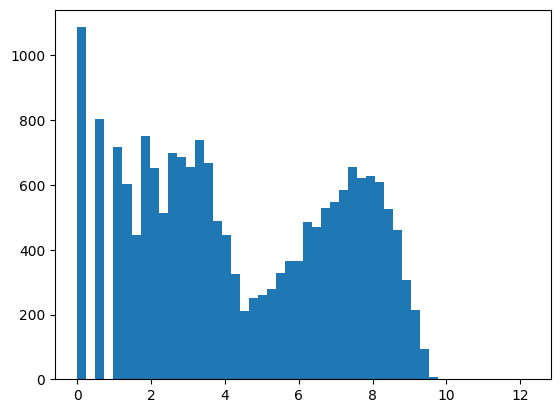

In [21]:
# Histogram of log transformed download count
plt.hist(df['log_download_count'], bins=50)
plt.show()

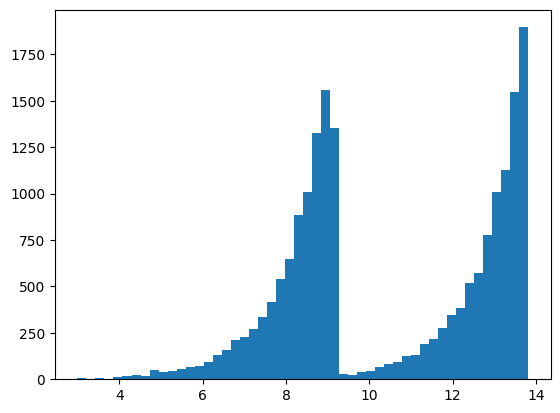

In [22]:
# Histogram of log transformed view count
plt.hist(df['log_view_count'], bins=50)
plt.show()

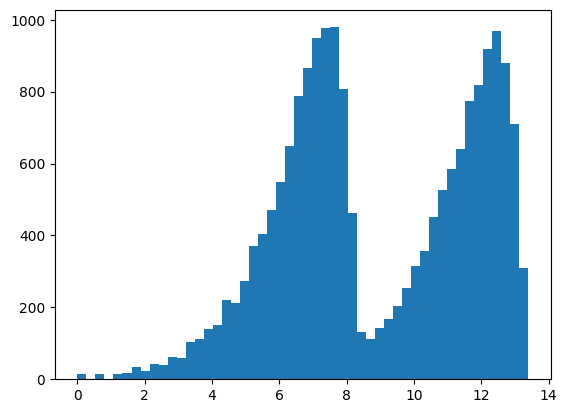

In [23]:
# Histogram of log like download count
plt.hist(df['log_like_count'], bins=50)
plt.show()

#### Thoughts on the Logarithmic Transformations
I was expecting for the columns that had underwent a logorathmic transformation to follow the "normal" distribution. Instead, we are getting a "bimodal" distribution. These two peaks likely show the differences between a "claim" and an "opinion". The logarithmic transformations might help some models like Logistic Regression, but probably will have little effect to no effect other models such as Random Forests.

In [24]:
# Check class balance
df.groupby("claim_status").count()

,#,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,log_view_count,log_like_count,log_share_count,log_download_count,log_comment_count
claim_status,,,,,,,,,,,,,,,,
claim,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608
opinion,9476,9476,9476,9476,9476,9476,9476,9476,9476,9476,9476,9476,9476,9476,9476,9476


#### One hot encoding the columns 'verified_status' and 'author_ban_status'

In order to use these columns, we need to "one hot encode" them. We encode 1 for yes and 0 for no. There are ways to do this using Pandas and Sklearn, but I felt it was easiest to use simple list comprehensions.

In [25]:
df['author_verified'] = [1 if status == 'verified' else 0 for status in df['verified_status']]
df['author_banned'] =  [1 if status == 'banned' else 0 for status in df['author_ban_status']]
df['author_under_review'] = [1 if status == 'under review' else 0 for status in df['author_ban_status']]

#### Transforming the Video Transcription to prepare for Machine Learning

The column video_transcription_text contains a lot of information that is unsuable in its current format for machine learning. To get some use out of the text, I am going to find the text length to see if that could be an important feature and in the next section use a "bag-of-words" model to find how likely the text is a claim or an opinion simply by the words contained in the sentence.

In [26]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
df["video_transcription_length"] = df["video_transcription_text"].str.len()


In [27]:
# Looking at the updated datafram
df

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,...,video_comment_count,log_view_count,log_like_count,log_share_count,log_download_count,log_comment_count,author_verified,author_banned,author_under_review,video_transcription_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.00,19425.00,241.00,...,0.00,12.75,9.87,5.48,0.00,0.00,0,0,1,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.00,77355.00,19034.00,...,684.00,11.86,11.26,9.85,7.06,6.53,0,0,0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.00,97690.00,2858.00,...,329.00,13.71,11.49,7.96,6.73,5.80,0,0,0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.00,239954.00,34812.00,...,584.00,12.99,12.39,10.46,7.12,6.37,0,0,0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.00,34987.00,4110.00,...,152.00,10.94,10.46,8.32,6.30,5.02,0,0,0,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.00,423.00,81.00,...,2.00,8.71,6.05,4.39,2.08,0.69,0,0,0,65
19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.00,820.00,70.00,...,0.00,8.00,6.71,4.25,1.10,1.10,0,0,0,66
19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.00,102.00,7.00,...,1.00,6.60,4.62,1.95,0.69,0.00,0,0,0,53
19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.00,655.00,123.00,...,4.00,8.13,6.48,4.81,2.40,1.39,0,0,0,80


In [28]:
# Seperating claims and opinions into two seperate dataframes
claim_df = df[df['claim_status']=='claim']
opinion_df = df[df['claim_status']=='opinion']

# Calculating the average length of claim text
print("Claim Average Length:")
print(claim_df['video_transcription_length'].mean())
print('')

# Calculating the average length of opinion text
print("Opinion Average Length")
print(opinion_df['video_transcription_length'].mean())

Claim Average Length:
95.37697751873439

Opinion Average Length
82.72256226255804


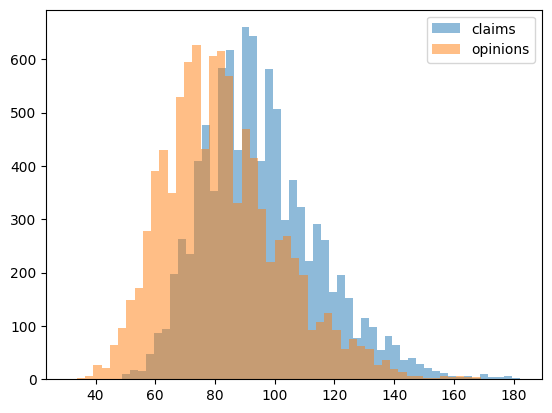

In [29]:
# Visualizing the distribution of `video_transcription_length` for claims and opinions

plt.hist(claim_df['video_transcription_length'],bins=50, alpha=.5, label='claims')
plt.hist(opinion_df['video_transcription_length'], bins=50, alpha=.5, label='opinions')
plt.legend()
plt.show()

### Splitting the data for Machine Learning and Setting Up Metrics


In [30]:
# Assign the target variable
y = df['claim_status'].replace({'claim':1, 'opinion':0})

In [31]:
# Isolate features
X = df.drop(columns=['#', 'claim_status', 'video_id', 'verified_status', 'author_ban_status', 'video_download_count', 'video_comment_count', 'video_view_count', 'video_like_count', 'video_share_count'])

#Please note: we will drop the 'video_transcription_text' column after we set up the bag-of-words model

In [32]:
# Looking at the features table
X.head()

,video_duration_sec,video_transcription_text,log_view_count,log_like_count,log_share_count,log_download_count,log_comment_count,author_verified,author_banned,author_under_review,video_transcription_length
0,59,someone shared with me that drone deliveries a...,12.75,9.87,5.48,0.00,0.00,0,0,1,97
1,32,someone shared with me that there are more mic...,11.86,11.26,9.85,7.06,6.53,0,0,0,107
2,31,someone shared with me that american industria...,13.71,11.49,7.96,6.73,5.80,0,0,0,137
3,25,someone shared with me that the metro of st. p...,12.99,12.39,10.46,7.12,6.37,0,0,0,131
4,19,someone shared with me that the number of busi...,10.94,10.46,8.32,6.30,5.02,0,0,0,128


In [33]:
# Splitting the data into training data (60%), validating data (20%), and testing data (20%)
from sklearn.model_selection import train_test_split

# Creates testing data and training/validating data
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Spliting the training/validating data
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size=0.25, random_state=42)

In [34]:
# Setting Up Metrics for Our Models

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

def get_metrics(y_true, y_pred):
    print("F1 Score: " + str(f1_score(y_true, y_pred)))
    print("Precision Score: " + str(precision_score(y_true, y_pred)))
    print("Recall Score: " + str(recall_score(y_true, y_pred)))
    print("Accuracy Score: " + str(accuracy_score(y_true, y_pred)))

# Part 4: Modeling

I will set up a bag-of-word model which will then be added as a feature for the other machine learning models to use. We will try out a few of the most popular machine learning models before we decide on our final model.

### Bag-of-Words Model (Added to Other Models)

To get some more information useful information from the transcription text, we are using a bag-of-words model to find how likely a transcription is a claim or an opinion just based on the words of the sentence. This bag-of-word model will be trained on the train_validate dataset and then added as a feature column for other machine learning algorithmns to use.

In [35]:
# Importing Common NLP Libraries

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import string


In [36]:
# Creating a Function That Counts the Frequency of Words Given a List of Sentences

def count_each_word(sentences_list):
    all_words = []
    count_words = {}

    stop_words = set(stopwords.words('english') + list(string.punctuation))

    for sentence in sentences_list:
        word_tokens = word_tokenize(sentence)
        for token in word_tokens:
            if token not in stop_words: # Stop words and punctionation are not included in the model
                all_words.append(token)

    for word in all_words:
        if word not in count_words:
            count_words[word] = 1
        else:
            count_words[word] = count_words[word] + 1
            
    return count_words

In [37]:
# Creating a train_validate df with only claim examples
claim_X_train_validate= X_train_validate.loc[y_train_validate==1]

# Getting a frequency count of all words in claim sentences
count_claim_words = count_each_word(claim_X_train_validate['video_transcription_text'])

# Getting a frequency count of all words in both claim and opinion sentences
count_all_words = count_each_word(X_train_validate['video_transcription_text'])

In [38]:
# Getting the probably that a word is used as part of a claim
claim_word_prob = {}

for word in count_all_words.keys():
    if count_all_words[word] >=25: #limits words to only words used at least 25 times in the train_validate data
        if word in count_claim_words.keys():
            claim_word_prob[word] = count_claim_words[word] / count_all_words[word]
        else:
            claim_word_prob[word] = 0

In [39]:
#Looking at the probablities of a word being used in a claim sentence
claim_word_prob

{'learned': 1.0,
 'media': 1.0,
 'claim': 1.0,
 'scottish': 0.5777777777777777,
 'first': 0.4888888888888889,
 'people': 0.5010845986984815,
 'fry': 0.5777777777777777,
 'chicken': 0.5348837209302325,
 'colleagues': 0,
 'feel': 0,
 'bubble': 0.5714285714285714,
 'wrap': 0.5714285714285714,
 'originally': 0.5714285714285714,
 'designed': 0.5714285714285714,
 'used': 0.504950495049505,
 'wallpaper': 0.5714285714285714,
 'colleague': 1.0,
 'located': 0.883495145631068,
 'article': 1.0,
 'mentioning': 1.0,
 'ravens': 0.5,
 'always': 0.5375,
 'aware': 0.5714285714285714,
 'someone': 0.9824561403508771,
 'watching': 0.5714285714285714,
 'discovered': 0.9754874651810584,
 '20': 0.506993006993007,
 'power': 0.525,
 'outages': 0.525,
 'u.s.': 0.477124183006536,
 'due': 0.5520833333333334,
 'squirrels': 0.49612403100775193,
 'chewing': 0.525,
 'lines': 0.525,
 'friends': 0.013038548752834467,
 'opinion': 0,
 'continental': 0.5434782608695652,
 'tectonic': 0.5434782608695652,
 'plates': 0.5434782

In [40]:
# Creating a function to get the probablities of every sentence in a list

def get_sentences_prob(sentences_list):
    total_scores = []
    for sentence in sentences_list:
        token_sent = word_tokenize(sentence)
        word_count = 0
        score = 0
        for word in token_sent:
            if word in claim_word_prob.keys():
                score += claim_word_prob[word]
                word_count += 1
        if word_count == 0:
            total_score = .5 # If the video contains only unique words, the probably is set to .5
        else: 
            total_score = score/word_count
        total_scores.append(total_score)
    return total_scores
        

In [41]:
# Adding a new claim probablity column based on the transcription to each of the features dataframes
# This is be a new feature that other models can consider when making their predictions

X_train['claim_transcription_prob'] = get_sentences_prob(X_train['video_transcription_text'])
X_validate['claim_transcription_prob'] = get_sentences_prob(X_validate['video_transcription_text'])
X_train_validate['claim_transcription_prob'] = get_sentences_prob(X_train_validate['video_transcription_text'])
X_test['claim_transcription_prob'] = get_sentences_prob(X_test['video_transcription_text'])

In [42]:
# Dropping the 'video_transcription_test' from all of the feature dataframes

X_train = X_train.drop(columns=['video_transcription_text'])
X_validate = X_validate.drop(columns=['video_transcription_text'])
X_train_validate = X_train_validate.drop(columns=['video_transcription_text'])
X_test = X_test.drop(columns=['video_transcription_text'])

#### Seeing How the Bag-of-Words Model Performs Before Being Added to Other Models

In [43]:
y_test_predictions = [1 if prob >= .5 else 0 for prob in X_test['claim_transcription_prob']]

In [44]:
get_metrics(y_test, y_test_predictions)

F1 Score: 0.9943269726663229
Precision Score: 0.9887179487179487
Recall Score: 1.0
Accuracy Score: 0.9942363112391931


The bag-of-word model performs incredibly well even before being added as a feature for other models. The dataset that Google provided for this seems to be very clean. In a real world scenerio this would be an incredible result. Nevertheless, let's add it to the other models I was planning on creating.

## Trying a few Machine Learning Models

### Logistic Regression Model

In [45]:
# Instatiating and fitting a logistic regression model
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42, max_iter=1000)

logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [46]:
# Getting the performance metrics
predictions = logistic_model.predict(X_validate)

get_metrics(y_validate, predictions)

F1 Score: 0.9957310565635006
Precision Score: 1.0
Recall Score: 0.9914984059511158
Accuracy Score: 0.9958082263557768


### Random Forest Model

In [47]:
# Instantiating and fitting the random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)

random_forest_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [48]:
# Getting the perfomance metrics
predictions = random_forest_model.predict(X_validate)

get_metrics(y_validate, predictions)

F1 Score: 0.9997342545841085
Precision Score: 1.0
Recall Score: 0.9994686503719448
Accuracy Score: 0.9997380141472361


### XGBoost model

In [49]:
# Instantiating and fitting the XGBoost classifier
from xgboost import XGBClassifier

XGB_model = XGBClassifier(random_state=42)

XGB_model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [50]:
# Getting the performance metrics
predictions = XGB_model.predict(X_validate)

get_metrics(y_validate, predictions)

F1 Score: 0.9997342545841085
Precision Score: 1.0
Recall Score: 0.9994686503719448
Accuracy Score: 0.9997380141472361


### Support Vector Machine Model

In [51]:
from sklearn.svm import SVC

SVC_model = SVC(kernel='rbf', random_state=42)

SVC_model.fit(X_train, y_train)

SVC(random_state=42)

In [52]:
# Getting the performance metrics
predictions = SVC_model.predict(X_validate)

get_metrics(y_validate, predictions)

F1 Score: 0.9840755735492578
Precision Score: 1.0
Recall Score: 0.9686503719447397
Accuracy Score: 0.9845428346869269


## Final Model Selection and Evaluation

All models performed incredibly well (Google must have cleaned up this data set quite a bit beforehand) with the Random Forest and XGBoost models performing the best. The Support Vector Machine model performed worse than simply using the bag-of-words model alone.

Since the Random Forest model was one of the top performers, I will retrain it on the training and validation data set and than see how it performs on the test data. This will be our final model.

In [53]:
# Instantiating and fitting the random forest classifier
final_model = RandomForestClassifier(random_state=42)

final_model.fit(X_train_validate, y_train_validate)


RandomForestClassifier(random_state=42)

In [54]:
# Getting the performance metrics on the final model
predictions = final_model.predict(X_test)

get_metrics(y_test, predictions)

F1 Score: 0.9997405966277562
Precision Score: 1.0
Recall Score: 0.9994813278008299
Accuracy Score: 0.9997380141472361


**The prediction results of this final model remain incredible. This suggests that the initial dataset was very clean to begin with and likely made to be oversimplified. I suspect Google for their course *The Nuts and Bolts of Machine Learning* wanted an 'easy' data set for beginners so they oversimplified the data. This result is very unlikely to occur in the real world.**


#### --- Just for Comparison ---

For comparison sake, let's see how our final model would have performed if it did not have the bag-of-words probablity column to help it out

In [55]:
# Drop the bag-of-words probability column

X_train_validate = X_train_validate.drop(columns=['claim_transcription_prob'])
X_test = X_test.drop(columns=['claim_transcription_prob'])

In [56]:
# Instantiating and fitting the random forest classifier with out the NLP column
no_NLP_model = RandomForestClassifier(random_state=42)

no_NLP_model.fit(X_train_validate, y_train_validate)


RandomForestClassifier(random_state=42)

In [57]:
# Getting the performance metrics on the final model if it had no NLP
predictions = no_NLP_model.predict(X_test)

get_metrics(y_test, predictions)

F1 Score: 0.9947889525794684
Precision Score: 0.9994764397905759
Recall Score: 0.9901452282157677
Accuracy Score: 0.994760282944721


*As you can see, using an NLP technique like the bag-of-words probablity model improves our final model. With the bag-of-words probability column our model detects 99.95% of claim video (recall score), while without NLP techniques it would only detect 99.01% of claim videos.*